## Data Science Challenge: Card Transactions!
### Name : Chinmay Sahu
#### Candidate id: C1857664
#### version: v20.01

# Question 1: Load
1. Programmatically download and load into your favorite analytical tool the transactions data. This data, which is in line-delimited JSON format, can be found here.
2. Please describe the structure of the data. Number of records and fields in each record?
3. Please provide some additional basic summary statistics for each field. Be sure to include a count of null, minimum, maximum, and unique values where appropriate.


### Importing Data 

In [1]:
import os
import numpy as np
import pandas as pd
from io import BytesIO
from urllib.request import urlopen
from zipfile import ZipFile
path=r'C:\Users\13152\Documents\C1_DS_Challenge' # set to the local path where downloaded file will be saved.
zipurl = 'https://github.com/CapitalOneRecruiting/DS/raw/master/transactions.zip' # change url from 'blob' to 'raw' for successful installation
with urlopen(zipurl) as zipresp:
    with ZipFile(BytesIO(zipresp.read())) as zfile:
        zfile.extractall(path=path)
        
os.rename(os.path.join(path,'transactions.txt'),os.path.join(path,'transactions.json'))# renaming file from txt to json

### Reading json file

In [2]:
df = pd.read_json(r'C:\Users\13152\Documents\C1_DS_Challenge\transactions.json', lines=True)  
df.replace('', np.nan, inplace=True) # replacing empty cells with Nan values

In [3]:
df.head() # looking at dataframe

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,...,echoBuffer,currentBalance,merchantCity,merchantState,merchantZip,cardPresent,posOnPremises,recurringAuthInd,expirationDateKeyInMatch,isFraud
0,737265056,737265056,5000,5000.0,2016-08-13T14:27:32,98.55,Uber,US,US,02,...,NaN,0.0,NaN,NaN,NaN,False,NaN,NaN,False,False
1,737265056,737265056,5000,5000.0,2016-10-11T05:05:54,74.51,AMC #191138,US,US,09,...,NaN,0.0,NaN,NaN,NaN,True,NaN,NaN,False,False
2,737265056,737265056,5000,5000.0,2016-11-08T09:18:39,7.47,Play Store,US,US,09,...,NaN,0.0,NaN,NaN,NaN,False,NaN,NaN,False,False
3,737265056,737265056,5000,5000.0,2016-12-10T02:14:50,7.47,Play Store,US,US,09,...,NaN,0.0,NaN,NaN,NaN,False,NaN,NaN,False,False
4,830329091,830329091,5000,5000.0,2016-03-24T21:04:46,71.18,Tim Hortons #947751,US,US,02,...,NaN,0.0,NaN,NaN,NaN,True,NaN,NaN,False,False


In [4]:
df.transactionDateTime=df.transactionDateTime.apply(pd.to_datetime) # convert the transactionDateTime object to datetime

In [5]:
df.isnull().sum()# check presence of null

accountNumber                    0
customerId                       0
creditLimit                      0
availableMoney                   0
transactionDateTime              0
transactionAmount                0
merchantName                     0
acqCountry                    4562
merchantCountryCode            724
posEntryMode                  4054
posConditionCode               409
merchantCategoryCode             0
currentExpDate                   0
accountOpenDate                  0
dateOfLastAddressChange          0
cardCVV                          0
enteredCVV                       0
cardLast4Digits                  0
transactionType                698
echoBuffer                  786363
currentBalance                   0
merchantCity                786363
merchantState               786363
merchantZip                 786363
cardPresent                      0
posOnPremises               786363
recurringAuthInd            786363
expirationDateKeyInMatch         0
isFraud             

In [6]:
df.info() # dataframe details

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 786363 entries, 0 to 786362
Data columns (total 29 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   accountNumber             786363 non-null  int64         
 1   customerId                786363 non-null  int64         
 2   creditLimit               786363 non-null  int64         
 3   availableMoney            786363 non-null  float64       
 4   transactionDateTime       786363 non-null  datetime64[ns]
 5   transactionAmount         786363 non-null  float64       
 6   merchantName              786363 non-null  object        
 7   acqCountry                781801 non-null  object        
 8   merchantCountryCode       785639 non-null  object        
 9   posEntryMode              782309 non-null  object        
 10  posConditionCode          785954 non-null  object        
 11  merchantCategoryCode      786363 non-null  object        
 12  cu

In [7]:
df.describe()# dataframe stats

,accountNumber,customerId,creditLimit,availableMoney,transactionAmount,cardCVV,enteredCVV,cardLast4Digits,echoBuffer,currentBalance,merchantCity,merchantState,merchantZip,posOnPremises,recurringAuthInd
count,7.863630e+05,7.863630e+05,786363.000000,786363.000000,786363.000000,786363.000000,786363.000000,786363.000000,0.0,786363.000000,0.0,0.0,0.0,0.0,0.0
mean,5.372326e+08,5.372326e+08,10759.464459,6250.725369,136.985791,544.467338,544.183857,4757.417799,NaN,4508.739089,NaN,NaN,NaN,NaN,NaN
std,2.554211e+08,2.554211e+08,11636.174890,8880.783989,147.725569,261.524220,261.551254,2996.583810,NaN,6457.442068,NaN,NaN,NaN,NaN,NaN
min,1.000881e+08,1.000881e+08,250.000000,-1005.630000,0.000000,100.000000,0.000000,0.000000,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
25%,3.301333e+08,3.301333e+08,5000.000000,1077.420000,33.650000,310.000000,310.000000,2178.000000,NaN,689.910000,NaN,NaN,NaN,NaN,NaN
50%,5.074561e+08,5.074561e+08,7500.000000,3184.860000,87.900000,535.000000,535.000000,4733.000000,NaN,2451.760000,NaN,NaN,NaN,NaN,NaN
75%,7.676200e+08,7.676200e+08,15000.000000,7500.000000,191.480000,785.000000,785.000000,7338.000000,NaN,5291.095000,NaN,NaN,NaN,NaN,NaN
max,9.993896e+08,9.993896e+08,50000.000000,50000.000000,2011.540000,998.000000,998.000000,9998.000000,NaN,47498.810000,NaN,NaN,NaN,NaN,NaN


In [8]:
"Dataset Dimensions: {}x{}".format(df.shape[0], df.shape[1])

'Dataset Dimensions: 786363x29'

In [9]:
"Total unique accounts: {}".format(len(df['accountNumber'].unique()))

'Total unique accounts: 5000'

In [10]:
"Total unique transactions based on transaction amount: {}".format(len(df['transactionAmount'].unique()))

'Total unique transactions based on transaction amount: 66038'

In [11]:
from termcolor import colored as cl # text customization
cases = len(df)
nonfraud_count = len(df[df.isFraud == False])
fraud_count = len(df[df.isFraud == True])
fraud_percentage = round(fraud_count/nonfraud_count*100, 2)

print(cl('CASE COUNT', attrs = ['bold']))
print(cl('--------------------------------------------', attrs = ['bold']))
print(cl('Total number of cases are {}'.format(cases), attrs = ['bold']))
print(cl('Number of Non-fraud cases are {}'.format(nonfraud_count), attrs = ['bold']))
print(cl('Number of Non-fraud cases are {}'.format(fraud_count), attrs = ['bold']))
print(cl('Percentage of fraud cases is {}'.format(fraud_percentage), attrs = ['bold']))
print(cl('--------------------------------------------', attrs = ['bold']))

CASE COUNT
--------------------------------------------
Total number of cases are 786363
Number of Non-fraud cases are 773946
Number of Non-fraud cases are 12417
Percentage of fraud cases is 1.6
--------------------------------------------


In [12]:
nonfraud_cases = df[df.isFraud == False]
fraud_cases = df[df.isFraud == True]

print(cl('CASE AMOUNT STATISTICS', attrs = ['bold']))
print(cl('--------------------------------------------', attrs = ['bold']))
print(cl('NON-FRAUD CASE AMOUNT STATS', attrs = ['bold']))
print(nonfraud_cases.transactionAmount.describe())
print(cl('--------------------------------------------', attrs = ['bold']))
print(cl('FRAUD CASE AMOUNT STATS', attrs = ['bold']))
print(fraud_cases.transactionAmount.describe())
print(cl('--------------------------------------------', attrs = ['bold']))

CASE AMOUNT STATISTICS
--------------------------------------------
NON-FRAUD CASE AMOUNT STATS
count    773946.000000
mean        135.570249
std         146.525305
min           0.000000
25%          33.190000
50%          86.760000
75%         189.390000
max        2011.540000
Name: transactionAmount, dtype: float64
--------------------------------------------
FRAUD CASE AMOUNT STATS
count    12417.000000
mean       225.215905
std        189.551393
min          0.000000
25%         86.000000
50%        176.980000
75%        311.460000
max       1608.350000
Name: transactionAmount, dtype: float64
--------------------------------------------


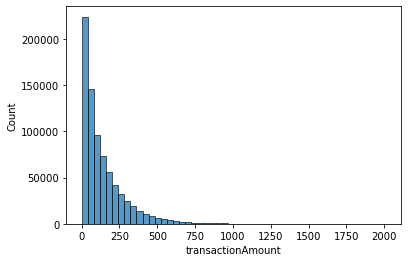

In [13]:
import seaborn as sns
sns.histplot(nonfraud_cases['transactionAmount'],bins=50)

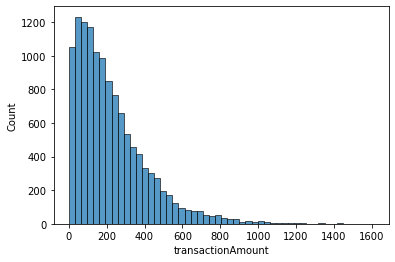

In [14]:
sns.histplot(fraud_cases['transactionAmount'],bins=50)

## Observation:
 
 1. The average amount spent by non-fraud cases is lower than the avergage amount spent by fraud cases.
 2. Fraud transactions are spread out and the deviation is also higher.

# Data Wrangling - Duplicate Transactions

### A duplicate transaction is of two types.

1. reversed transaction (only two transaction of same amount for a single account number)
2. multi swipe transaction (more than two transaction of same amount for a single account number)

In [15]:
reversal=df[df['transactionType']=='REVERSAL'] # filter transactions based on REVERSAL
reversal.head()

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,...,echoBuffer,currentBalance,merchantCity,merchantState,merchantZip,cardPresent,posOnPremises,recurringAuthInd,expirationDateKeyInMatch,isFraud
39,574788567,574788567,2500,2200.98,2016-05-24 01:38:03,215.13,Convenient Tire,US,US,09,...,NaN,299.02,NaN,NaN,NaN,True,NaN,NaN,False,False
73,574788567,574788567,2500,2432.72,2016-10-07 10:23:57,3.87,Eazy Repair,US,US,05,...,NaN,67.28,NaN,NaN,NaN,True,NaN,NaN,False,False
101,924729945,924729945,50000,49831.43,2016-10-19 14:01:45,168.57,discount.com,US,US,05,...,NaN,168.57,NaN,NaN,NaN,False,NaN,NaN,False,False
133,984504651,984504651,50000,46367.41,2016-01-16 09:53:15,450.74,Planet Fitness #849960,US,US,05,...,NaN,3632.59,NaN,NaN,NaN,False,NaN,NaN,False,False
156,984504651,984504651,50000,41909.30,2016-01-25 20:39:15,81.73,AMC #724446,US,US,09,...,NaN,8090.70,NaN,NaN,NaN,True,NaN,NaN,False,False


In [16]:
print(cl('Highest amount to be reversed is {} USD'.format(reversal['transactionAmount'].max()), attrs = ['bold']))
print(cl('Total number of reverse transactions are {} '.format(len(reversal['transactionAmount'])), attrs = ['bold']))
print(cl('Total sum of reverse transaction is {} USD'.format(reversal['transactionAmount'].sum()), attrs = ['bold']))

Highest amount to be reversed is 1435.64 USD
Total number of reverse transactions are 20303 
Total sum of reverse transaction is 2821792.5 USD


In [17]:
reversal.describe()

,accountNumber,customerId,creditLimit,availableMoney,transactionAmount,cardCVV,enteredCVV,cardLast4Digits,echoBuffer,currentBalance,merchantCity,merchantState,merchantZip,posOnPremises,recurringAuthInd
count,2.030300e+04,2.030300e+04,20303.000000,20303.000000,20303.000000,20303.000000,20303.000000,20303.000000,0.0,20303.000000,0.0,0.0,0.0,0.0,0.0
mean,5.358713e+08,5.358713e+08,10890.065508,6066.488049,138.984017,544.582623,544.331577,4746.035463,NaN,4823.577459,NaN,NaN,NaN,NaN,NaN
std,2.550463e+08,2.550463e+08,11731.251958,8731.066585,147.889733,262.936600,262.868166,3011.053090,NaN,6583.948171,NaN,NaN,NaN,NaN,NaN
min,1.000881e+08,1.000881e+08,250.000000,-440.580000,0.000000,100.000000,30.000000,0.000000,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
25%,3.296389e+08,3.296389e+08,5000.000000,1071.730000,33.375000,308.000000,308.000000,2178.000000,NaN,886.570000,NaN,NaN,NaN,NaN,NaN
50%,4.986956e+08,4.986956e+08,7500.000000,3017.830000,92.010000,537.000000,536.000000,4733.000000,NaN,2803.480000,NaN,NaN,NaN,NaN,NaN
75%,7.676200e+08,7.676200e+08,15000.000000,7305.500000,192.980000,787.000000,787.000000,7343.000000,NaN,5815.565000,NaN,NaN,NaN,NaN,NaN
max,9.992836e+08,9.992836e+08,50000.000000,50000.000000,1435.640000,998.000000,998.000000,9998.000000,NaN,47470.790000,NaN,NaN,NaN,NaN,NaN


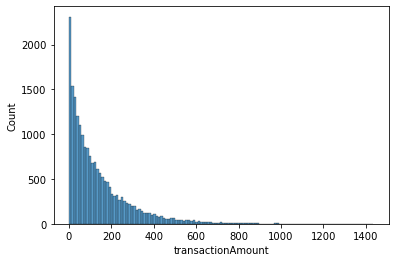

In [18]:
sns.histplot(reversal['transactionAmount'])

In [19]:
# number of transactions with 0.00 amount in the number of reverse transaction is
print(cl('Total number of reverse transactions where card charged is 0.00 USD : {} '.format(len(reversal[reversal['transactionAmount']==0.00])), attrs = ['bold']))

Total number of reverse transactions where card charged is 0.00 USD : 572 


# Multi-Swipe

In [20]:
df = df.sort_values(by='transactionDateTime',ascending=True)

In [21]:
# groupby accountNumber,transactionAmount and transactionDateTime diff to check whether the difference between successive transactions is less than 120 seconds:
df['multiSwipe?'] = (df.sort_values(['transactionDateTime'])
                       .groupby(['accountNumber', 'transactionAmount'], sort=False)['transactionDateTime']
                       .diff()
                       .dt.total_seconds()
                       .lt(120))

In [22]:
mSwipe=df[df['multiSwipe?']==True].sort_values(by='transactionAmount') # filter all multiswipe transactions
mSwipe

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,...,currentBalance,merchantCity,merchantState,merchantZip,cardPresent,posOnPremises,recurringAuthInd,expirationDateKeyInMatch,isFraud,multiSwipe?
386456,283694178,283694178,10000,2524.66,2016-05-24 07:43:12,0.00,AMC #191138,US,US,05,...,7475.34,NaN,NaN,NaN,False,NaN,NaN,False,False,True
584713,882815134,882815134,50000,34503.54,2016-05-28 08:05:19,0.00,Renaissance Hotel #16717,US,US,09,...,15496.46,NaN,NaN,NaN,False,NaN,NaN,False,False,True
332660,748304722,748304722,15000,827.33,2016-05-28 04:25:28,0.00,alibaba.com,US,US,05,...,14172.67,NaN,NaN,NaN,False,NaN,NaN,False,False,True
390047,776198499,776198499,7500,6988.66,2016-11-29 01:54:47,0.00,walmart.com,US,US,05,...,511.34,NaN,NaN,NaN,False,NaN,NaN,False,False,True
621338,456184078,456184078,20000,12334.64,2016-03-09 18:39:21,0.00,Lyft,US,US,02,...,7665.36,NaN,NaN,NaN,False,NaN,NaN,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
392853,569040573,569040573,500,-304.11,2016-05-15 13:07:35,1120.04,oldnavy.com,US,US,05,...,804.11,NaN,NaN,NaN,False,NaN,NaN,False,False,True
609552,780227396,780227396,20000,12661.51,2016-01-08 14:50:52,1265.94,alibaba.com,US,US,05,...,7338.49,NaN,NaN,NaN,False,NaN,NaN,False,False,True
682993,230163539,230163539,500,-80.25,2016-03-22 08:46:56,1338.25,AMC #79863,US,US,05,...,580.25,NaN,NaN,NaN,True,NaN,NaN,False,False,True
568811,448544073,448544073,2500,2351.00,2016-01-23 09:46:44,1394.19,Subway #19692,US,US,05,...,149.00,NaN,NaN,NaN,True,NaN,NaN,False,False,True


In [23]:
mSwipe['transactionAmount'].sum()

1304345.4100000001

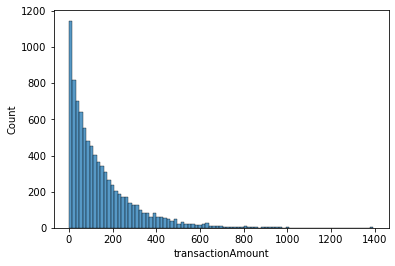

In [24]:
sns.histplot(mSwipe['transactionAmount'])

In [25]:
print(cl('Total number of multi swipe transactions: {} '.format(len(mSwipe)), attrs = ['bold']))

Total number of multi swipe transactions: 8882 


In [26]:
print(cl('Most of the high frequency transactions are of 0.00 USD', attrs = ['bold']))
# After removing transactions with 0.00 amount, the number of reverse transaction is
print(cl('Total number of multi swipe transactions of 0.00 USD: {} '.format(len(mSwipe[mSwipe['transactionAmount']==0.00])), attrs = ['bold']))

Most of the high frequency transactions are of 0.00 USD
Total number of multi swipe transactions of 0.00 USD: 243 


In [27]:
print(cl('Total amount of multi swipe transactions: {} USD '.format(mSwipe['transactionAmount'].sum()), attrs = ['bold']))

Total amount of multi swipe transactions: 1304345.4100000001 USD 


In [28]:
print(cl('Total sum of multi swipe and reverse transactions: {} USD'.format(mSwipe['transactionAmount'].sum()+reversal['transactionAmount'].sum()), attrs = ['bold']))

Total sum of multi swipe and reverse transactions: 4126137.91 USD


In [29]:
print(cl('Total number of multi swipe and reverse transactions: {}'.format(len(mSwipe)+len(reversal)), attrs = ['bold']))

Total number of multi swipe and reverse transactions: 29185


In [30]:
revSwipe_percentage = round(len(reversal)/cases*100, 2)
mSwipe_percentage = round(len(mSwipe)/cases*100, 2)
print(cl('Reverse Swipe and Multi Swipe COUNT', attrs = ['bold']))
print(cl('--------------------------------------------', attrs = ['bold']))
print(cl('Total number of cases are {}'.format(cases), attrs = ['bold']))
print(cl('Percentage of reverse swipe cases are {}'.format(revSwipe_percentage), attrs = ['bold']))
print(cl('Percentage of multi swipe cases are {}'.format(mSwipe_percentage), attrs = ['bold']))
print(cl('--------------------------------------------', attrs = ['bold']))

Reverse Swipe and Multi Swipe COUNT
--------------------------------------------
Total number of cases are 786363
Percentage of reverse swipe cases are 2.58
Percentage of multi swipe cases are 1.13
--------------------------------------------


# Model design for fraud detection 

## Feature Selection

In [31]:
# extract month, weekday, hour, minute, and second information from transactionDateTime as features
df['month'] = df['transactionDateTime'].apply(lambda x: x.month)
df['day'] = df['transactionDateTime'].apply(lambda x: x.day)
df['weekday'] = df['transactionDateTime'].apply(lambda x: x.dayofweek)
df['hour'] = df['transactionDateTime'].apply(lambda x: x.hour)
df['minute'] = df['transactionDateTime'].apply(lambda x: x.hour)
df['seconds'] = df['transactionDateTime'].apply(lambda x: x.second)

In [32]:
# Replace False with 0 and True with 1
df['matchingCVV'] = df['cardCVV'] == df['enteredCVV']

for col in ['cardPresent', 'matchingCVV', 'expirationDateKeyInMatch', 'isFraud','multiSwipe?']:
    df[col] = df[col].replace({False: 0, True: 1})
account_number = df['accountNumber']
df.head()

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,...,expirationDateKeyInMatch,isFraud,multiSwipe?,month,day,weekday,hour,minute,seconds,matchingCVV
640789,419104777,419104777,50000,50000.0,2016-01-01 00:01:02,44.09,Washington Post,US,US,09,...,0,0,0,1,1,4,0,0,2,1
28946,674577133,674577133,5000,5000.0,2016-01-01 00:01:44,329.57,staples.com,US,US,09,...,0,0,0,1,1,4,0,0,44,1
222211,958438658,958438658,20000,20000.0,2016-01-01 00:01:47,164.57,cheapfast.com,US,US,05,...,0,0,0,1,1,4,0,0,47,1
470320,851126461,851126461,10000,10000.0,2016-01-01 00:02:04,122.83,discount.com,US,US,02,...,0,0,0,1,1,4,0,0,4,1
704106,148963316,148963316,2500,2500.0,2016-01-01 00:02:19,0.00,Fast Repair,US,US,05,...,0,0,0,1,1,4,0,0,19,1


In [33]:
df.shape

(786363, 37)

In [34]:
df.columns = df.columns.str.replace(' ','') #replace empty str with "" and then replacing NaN vals with 0
df['posEntryMode']= df['posEntryMode'].replace('', 0)
df['posConditionCode']= df['posConditionCode'].replace('', 0)
df.posEntryMode=df.posEntryMode.astype(str).astype(float).fillna(0.0)
df.posConditionCode=df.posConditionCode.astype(str).astype(float).fillna(0.0)

In [35]:
# drop columns that are not required for model design
df.drop(['echoBuffer',
         'cardLast4Digits',
         'merchantName',
         'acqCountry',
         'merchantCountryCode',
         'merchantCategoryCode',
         'accountOpenDate',
         'transactionType',
         'merchantCity',
         'merchantState',
         'merchantZip',
         'transactionDateTime',
         'currentExpDate',
         'posOnPremises',
         'recurringAuthInd',
         'customerId',
         'dateOfLastAddressChange',
         'enteredCVV',
         'cardCVV',
         ], inplace=True, axis=1)
df.head()

,accountNumber,creditLimit,availableMoney,transactionAmount,posEntryMode,posConditionCode,currentBalance,cardPresent,expirationDateKeyInMatch,isFraud,multiSwipe?,month,day,weekday,hour,minute,seconds,matchingCVV
640789,419104777,50000,50000.0,44.09,9.0,1.0,0.0,0,0,0,0,1,1,4,0,0,2,1
28946,674577133,5000,5000.0,329.57,9.0,8.0,0.0,0,0,0,0,1,1,4,0,0,44,1
222211,958438658,20000,20000.0,164.57,5.0,1.0,0.0,0,0,0,0,1,1,4,0,0,47,1
470320,851126461,10000,10000.0,122.83,2.0,8.0,0.0,0,0,0,0,1,1,4,0,0,4,1
704106,148963316,2500,2500.0,0.00,5.0,1.0,0.0,0,0,0,0,1,1,4,0,0,19,1


In [36]:
df.isnull().sum() # making sure we do not have any null values

accountNumber               0
creditLimit                 0
availableMoney              0
transactionAmount           0
posEntryMode                0
posConditionCode            0
currentBalance              0
cardPresent                 0
expirationDateKeyInMatch    0
isFraud                     0
multiSwipe?                 0
month                       0
day                         0
weekday                     0
hour                        0
minute                      0
seconds                     0
matchingCVV                 0
dtype: int64

### Class imbalance problem

One of the solution is to implement under sampling. Undersampling the majority class (non-fraud cases) is a straightforward method to adjust imbalanced data. In this process, I take random draws from the non-fraud observations, to match the occurences of fraud observations.

Another approach is oversampling the minority class (fraud cases). Here, we take random draws from the fraud cases and copy those observations to increase the amount of fraud samples.

Both methods lead to having a balance between fraud and non-fraud cases.

#### Drawbacks
1. with random undersampling, a lot of data is thrown away.
2. with oversampling, the model will be trained on a lot of duplicates.

In [39]:
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler

In [40]:
rus = RandomUnderSampler()
y = df['isFraud']
df1=df.drop('isFraud', axis=1)
new_x, new_y = rus.fit_resample(df1, y)
print(f'Before Random Under Sampling: {df1.shape}')
print(f'After Random Under Sampling: {new_x.shape}')

Before Random Under Sampling: (786363, 17)
After Random Under Sampling: (24834, 17)


# Model Selection

Here, we are dealing with a classification problem. I will test model with Logistic regression, Decision trees, Random forest, and XGBoost. These algorithms do not require feature scaling. Hence, I did not scale features and I am going to test their performance.

In [44]:
x_train, x_test, y_train, y_test = train_test_split(new_x, new_y,test_size = 0.2) # test train split

In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import r2_score, classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve, precision_recall_curve, average_precision_score
from sklearn.ensemble import RandomForestClassifier, VotingClassifier

In [46]:
# Fit a logistic regression model to our data
model = LogisticRegression(solver='liblinear')
model.fit(x_train, y_train)

# Obtain model predictions
predicted = model.predict(x_test)

# Print the classifcation report and confusion matrix
print('Classification report:\n', classification_report(y_test, predicted))
conf_mat = confusion_matrix(y_true=y_test, y_pred=predicted)
print('Confusion matrix:\n', conf_mat)

Classification report:
               precision    recall  f1-score   support

           0       0.50      0.67      0.57      2441
           1       0.52      0.34      0.41      2526

    accuracy                           0.50      4967
   macro avg       0.51      0.51      0.49      4967
weighted avg       0.51      0.50      0.49      4967

Confusion matrix:
 [[1633  808]
 [1663  863]]


In [47]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(x_train, y_train)
predicted = model.predict(x_test)
print(f'Accuracy Score:\n{accuracy_score(y_test, predicted)}')
print('Classification report:\n', classification_report(y_test, predicted))

Accuracy Score:
0.7004227904167506
Classification report:
               precision    recall  f1-score   support

           0       0.68      0.73      0.71      2441
           1       0.72      0.67      0.70      2526

    accuracy                           0.70      4967
   macro avg       0.70      0.70      0.70      4967
weighted avg       0.70      0.70      0.70      4967



In [51]:
import warnings
warnings.filterwarnings("ignore")
from xgboost import XGBClassifier # XGBoost algorithm
xgb = XGBClassifier(max_depth = 4)
xgb.fit(x_train, y_train)
predicted = xgb.predict(x_test)

print(f'Accuracy Score:\n{accuracy_score(y_test, predicted):0.3f}')
print('Classification report:\n', classification_report(y_test, predicted))

[22:22:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy Score:
0.718
Classification report:
               precision    recall  f1-score   support

           0       0.70      0.74      0.72      2441
           1       0.73      0.70      0.72      2526

    accuracy                           0.72      4967
   macro avg       0.72      0.72      0.72      4967
weighted avg       0.72      0.72      0.72      4967



#### Recall is defined as true positives relative to the sum of true positives and false negative Fraction of predicted fraud cases out of all actual fraud cases is represented by recall. Credit card companies want to optimize recall.

From the results, we see the best performing model is XgBoost with F1 score of 0.72. The weighted avg of recall is 0.72 for XgBoost.

With more time, I would like to implement oversampling using SMOTE.

I would like to select features based on their importance.

Also, I would like to test F1- score, precision, and recall using deep neural network.

I would try adjusting model parameter to optimize for fraud detection. A few approach to do that would be Model adjustments using class weight, Parameter optimization with GridSearchCV.

Also, I will test with ensemble methods that create multiple machine learning models and then combine them to produce a final result using a Voting Classifier.

### References

1. [group by](https://stackoverflow.com/questions/17666075/python-pandas-groupby-result)
2. [github download](https://stackoverflow.com/questions/22676/how-do-i-download-a-file-over-http-using-python)
3. [Fraud detection blog](https://medium.com/codex/credit-card-fraud-detection-with-machine-learning-in-python-ac7281991d87)
4. [Sk-learn documentation](https://scikit-learn.org/stable/)